In [208]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

In [209]:
data = pd.read_csv('./relevant_data/wrangled_data.csv')

In [210]:
data.head()

,state,county,state_house_blue_perc,density_km,days_counted,case_count_28_days,death_count_28_days,confirmed_infection(%_of_pop),death_perc(%_of_case),avg_daily_case_increase(%_of_pop),...,percent_65_and_over,percent_black,percent_american_indian_alaska_native,percent_asian,percent_native_hawaiian_other_pacific_islander,percent_hispanic,percent_non_hispanic_white,percent_not_proficient_in_english,percent_female,percent_rural
0,Alabama,Autauga,22.86,35.436,42,28,1,0.097121,5.660377,0.002312,...,15.562670,19.343177,0.480207,1.224798,0.111509,2.965774,74.308016,0.820225,51.448715,42.002162
1,Alabama,Baldwin,22.86,44.261,52,59,1,0.103695,2.645503,0.001994,...,20.443350,8.783976,0.772399,1.150343,0.066966,4.646779,83.111337,0.543517,51.538377,42.279099
2,Alabama,Barbour,22.86,11.979,32,39,1,0.171177,2.127660,0.005349,...,19.420441,48.032635,0.659137,0.454162,0.184880,4.276355,45.641252,1.631683,47.216752,67.789635
3,Alabama,Bibb,22.86,14.215,36,38,0,0.187650,0.000000,0.005213,...,16.473214,21.120536,0.437500,0.236607,0.116071,2.625000,74.589286,0.268210,46.781250,68.352607
4,Alabama,Blount,22.86,34.325,41,26,0,0.069781,0.000000,0.001702,...,18.236515,1.462656,0.653527,0.319848,0.121024,9.571231,86.886238,1.724520,50.726141,89.951502


In [211]:
data.columns

Index(['state', 'county', 'state_house_blue_perc', 'density_km',
       'days_counted', 'case_count_28_days', 'death_count_28_days',
       'confirmed_infection(%_of_pop)', 'death_perc(%_of_case)',
       'avg_daily_case_increase(%_of_pop)', 'case_count_28_days(%_of_pop)',
       'death_count_28_days(%_of_case)', 'percent_fair_or_poor_health',
       'percent_low_birthweight', 'percent_smokers',
       'percent_adults_with_obesity', 'food_environment_index',
       'percent_physically_inactive',
       'percent_with_access_to_exercise_opportunities',
       'percent_excessive_drinking',
       'percent_driving_deaths_with_alcohol_involvement', 'chlamydia_rate',
       'teen_birth_rate', 'percent_uninsured',
       'preventable_hospitalization_rate', 'percent_with_annual_mammogram',
       'percent_vaccinated', 'high_school_graduation_rate',
       'percent_some_college', 'labor_force', 'percent_unemployed',
       'percent_children_in_poverty', '80th_percentile_income',
       '20th_pe

In [215]:
excluded_columns = [
    'state', 
    'county',  
    'days_counted', 
    'case_count_28_days',
    'death_count_28_days', 
    'confirmed_infection(%_of_pop)',
    'death_perc(%_of_case)', 
    'avg_daily_case_increase(%_of_pop)',
    'case_count_28_days(%_of_pop)', 
    'death_count_28_days(%_of_case)',
    'presence_of_water_violation',
    'state_house_blue_perc'
    
]

In [216]:
data_subset = data[excluded_columns]

In [217]:
main_data = data.drop(excluded_columns, axis=1)

In [218]:
main_data.columns

Index(['density_km', 'percent_fair_or_poor_health', 'percent_low_birthweight',
       'percent_smokers', 'percent_adults_with_obesity',
       'food_environment_index', 'percent_physically_inactive',
       'percent_with_access_to_exercise_opportunities',
       'percent_excessive_drinking',
       'percent_driving_deaths_with_alcohol_involvement', 'chlamydia_rate',
       'teen_birth_rate', 'percent_uninsured',
       'preventable_hospitalization_rate', 'percent_with_annual_mammogram',
       'percent_vaccinated', 'high_school_graduation_rate',
       'percent_some_college', 'labor_force', 'percent_unemployed',
       'percent_children_in_poverty', '80th_percentile_income',
       '20th_percentile_income', 'percent_single_parent_households',
       'social_association_rate', 'injury_death_rate', 'average_daily_pm2_5',
       'percent_severe_housing_problems', 'severe_housing_cost_burden',
       'overcrowding', 'inadequate_facilities', 'percent_drive_alone_to_work',
       'percent_lo

In [219]:
chi_square_value, p_value = calculate_bartlett_sphericity(main_data)

In [220]:
chi_square_value, p_value

(189684.9416499067, 0.0)

In [221]:
kmo_all, kmo_model = calculate_kmo(main_data)

In [222]:
kmo_model

0.8519693034625644

In [223]:
main_data.shape

(2337, 59)

In [266]:
fa = FactorAnalyzer()
fa.set_params(n_factors=25, rotation='quartimax')
fa.fit(main_data)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=25, rotation='quartimax',
               rotation_kwargs={}, use_smc=True)

In [271]:
ev, _, _ = fa.get_factor_variance()

In [272]:
ev

array([16.09256732,  4.92089688,  3.38376133,  3.12933171,  2.40356586,
        2.3295524 ,  1.8941735 ,  1.79759012,  1.50038271,  1.39409758,
        1.10069808,  0.88718335,  0.70387877,  0.61635818,  0.60031018,
        0.49782043,  0.47832413,  0.46668096,  0.45323719,  0.40630176,
        0.39045484,  0.36962788,  0.32394679,  0.21968745,  0.18966219])

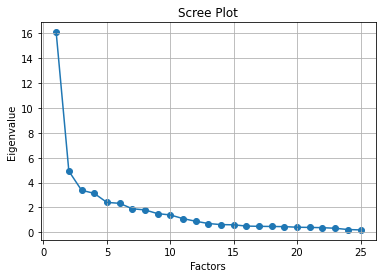

In [273]:
# Create scree plot using matplotlib
plt.scatter(range(1, 26), ev)
plt.plot(range(1, 26), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [278]:
fa = FactorAnalyzer()
fa.set_params(n_factors=11, rotation='quartimax')
fa.fit(main_data)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=11, rotation='quartimax',
               rotation_kwargs={}, use_smc=True)

In [279]:
fa.get_factor_variance()

(array([16.13937953,  5.05119121,  3.68866183,  3.13433241,  2.38523475,
         2.30173803,  2.08001212,  1.63139762,  1.52318355,  1.19327769,
         1.1163117 ]),
 array([0.27354881, 0.08561341, 0.06251969, 0.05312428, 0.04042771,
        0.03901251, 0.03525444, 0.02765081, 0.02581667, 0.02022505,
        0.01892054]),
 array([0.27354881, 0.35916222, 0.42168191, 0.47480619, 0.51523389,
        0.5542464 , 0.58950085, 0.61715165, 0.64296832, 0.66319337,
        0.68211391]))

In [280]:
factor_df = pd.DataFrame(fa.loadings_)

In [281]:
factor_df.index = main_data.columns

In [282]:
factor_df.shape

(59, 11)

In [283]:
pd.set_option('display.max_rows', None)
factor_df

,0,1,2,3,4,5,6,7,8,9,10
density_km,-0.189960,0.279770,0.090462,-0.057568,0.066682,0.084272,0.073856,0.655655,-0.019291,-0.014063,0.047066
percent_fair_or_poor_health,0.898007,0.090010,0.239735,0.097019,0.117575,0.055822,0.070370,0.018294,-0.097376,0.037412,-0.071221
percent_low_birthweight,0.644493,0.168531,-0.059532,0.009925,-0.006687,0.428832,0.114386,0.057256,-0.099031,0.112502,-0.074238
percent_smokers,0.831168,-0.074280,-0.214469,-0.138262,0.177030,-0.109455,0.023540,0.007760,0.031614,-0.010215,0.060158
percent_adults_with_obesity,0.594231,-0.252682,-0.071765,-0.079502,0.146282,0.176224,0.024047,-0.125130,-0.046415,-0.000986,0.165660
food_environment_index,-0.716465,-0.212876,0.030585,-0.110222,-0.063060,-0.284991,0.172710,0.012470,-0.074675,0.035841,0.550149
percent_physically_inactive,0.710680,-0.232986,-0.095801,0.096797,0.027679,0.047854,0.108626,-0.000937,-0.128687,0.027686,0.139032
percent_with_access_to_exercise_opportunities,-0.529215,0.294977,0.105286,-0.202253,0.012578,-0.063003,-0.260118,0.137752,-0.003118,0.257895,-0.040180
percent_excessive_drinking,-0.678453,0.018298,-0.013033,-0.198296,0.144662,-0.053092,-0.162378,-0.030992,0.049636,-0.207515,0.080876
percent_driving_deaths_with_alcohol_involvement,-0.056923,0.051463,0.005637,-0.143172,-0.060773,0.050307,0.023508,-0.096025,0.194286,-0.067640,-0.001303


Notes:

0. Poor well-being both physically and mentally
1. Shelter issue severity 
2. Lack of insurance
3. Availability to health/wellness facilities
4. Crime/Labour force
5. How young the population is
6. Overpopulation
7. Not sure - percent_female, percent_drive_alone_to_work, average_daily_pm2_5
8. Poor food index

In [284]:
main_data_transformed = pd.DataFrame(fa.transform(main_data))

In [285]:
data = pd.concat([data_subset, main_data_transformed], axis=1)

In [286]:
data.corr(method='pearson')['case_count_28_days(%_of_pop)']

days_counted                         0.022211
case_count_28_days                   0.327511
death_count_28_days                  0.264973
confirmed_infection(%_of_pop)        0.771089
death_perc(%_of_case)                0.065693
avg_daily_case_increase(%_of_pop)    0.837882
case_count_28_days(%_of_pop)         1.000000
death_count_28_days(%_of_case)       0.022168
state_house_blue_perc               -0.018564
0                                    0.057321
1                                    0.105562
2                                    0.014983
3                                    0.030488
4                                    0.024087
5                                    0.127387
6                                    0.083529
7                                    0.018574
8                                   -0.066828
9                                   -0.061663
10                                   0.014238
Name: case_count_28_days(%_of_pop), dtype: float64

In [287]:
data.shape

(2337, 23)

In [288]:
blue_data = data[data['state_house_blue_perc'] >= 50]

In [289]:
light_red_data = data[(data['state_house_blue_perc'] < 50) & (data['state_house_blue_perc'] >= 40)]

In [290]:
red_data = data[data['state_house_blue_perc'] < 40]

In [291]:
blue_data.shape

(509, 23)

In [292]:
light_red_data.shape

(533, 23)

In [293]:
red_data.shape

(1295, 23)

In [294]:
blue_data.corr(method='pearson')['case_count_28_days(%_of_pop)']

days_counted                         0.055998
case_count_28_days                   0.659087
death_count_28_days                  0.538823
confirmed_infection(%_of_pop)        0.827320
death_perc(%_of_case)                0.096363
avg_daily_case_increase(%_of_pop)    0.874609
case_count_28_days(%_of_pop)         1.000000
death_count_28_days(%_of_case)       0.005521
state_house_blue_perc               -0.007918
0                                   -0.164445
1                                    0.197671
2                                   -0.012882
3                                    0.060338
4                                    0.066866
5                                    0.018110
6                                    0.207372
7                                    0.124765
8                                   -0.159060
9                                    0.025990
10                                   0.053206
Name: case_count_28_days(%_of_pop), dtype: float64

In [295]:
light_red_data.corr(method='pearson')['case_count_28_days(%_of_pop)']

days_counted                         0.114785
case_count_28_days                   0.482496
death_count_28_days                  0.448028
confirmed_infection(%_of_pop)        0.787700
death_perc(%_of_case)                0.131640
avg_daily_case_increase(%_of_pop)    0.824788
case_count_28_days(%_of_pop)         1.000000
death_count_28_days(%_of_case)       0.077180
state_house_blue_perc               -0.046222
0                                    0.076432
1                                    0.184907
2                                    0.109836
3                                   -0.070215
4                                    0.018297
5                                    0.090334
6                                    0.127160
7                                    0.161620
8                                    0.041684
9                                    0.000957
10                                   0.045472
Name: case_count_28_days(%_of_pop), dtype: float64

In [296]:
red_data.corr(method='pearson')['case_count_28_days(%_of_pop)']

days_counted                         0.018462
case_count_28_days                   0.408829
death_count_28_days                  0.283541
confirmed_infection(%_of_pop)        0.791114
death_perc(%_of_case)                0.067000
avg_daily_case_increase(%_of_pop)    0.840168
case_count_28_days(%_of_pop)         1.000000
death_count_28_days(%_of_case)       0.021630
state_house_blue_perc                0.064840
0                                    0.087179
1                                    0.109266
2                                    0.009459
3                                    0.020890
4                                   -0.028471
5                                    0.169311
6                                    0.050435
7                                   -0.073039
8                                   -0.061795
9                                   -0.106207
10                                   0.001726
Name: case_count_28_days(%_of_pop), dtype: float64

In [297]:
def assign_political_category(row):
    if row['state_house_blue_perc'] >= 50:
        return 'blue'
    elif row['state_house_blue_perc'] >= 40:
        return 'light red'
    else:
        return 'red'

In [298]:
data['political_affiation'] = data.apply(assign_political_category, axis=1)

In [300]:
data.columns = ['state', 'county', 'days_counted', 'case_count_28_days',
       'death_count_28_days', 'confirmed_infection(%_of_pop)',
       'death_perc_percent_of_case', 'avg_daily_case_increase(%_of_pop)',
       'case_count_28_days_percent_of_pop', 'death_count_28_days(%_of_case)',
       'presence_of_water_violation', 'state_house_blue_perc', 'a', 'b', 'c',
       'd', 'e', 'f', 'g', 'h', 'x', 'y', 'z', 'political_affiation']

In [301]:
data.to_csv('./relevant_data/factorized_data.csv', index=False)

In [313]:
data.describe()

,days_counted,case_count_28_days,death_count_28_days,confirmed_infection(%_of_pop),death_perc_percent_of_case,avg_daily_case_increase(%_of_pop),case_count_28_days_percent_of_pop,death_count_28_days(%_of_case),state_house_blue_perc,a,b,c,d,e,f,g,h,x,y,z
count,2337.000000,2337.000000,2337.000000,2337.000000,2337.000000,2337.000000,2337.000000,2337.000000,2337.000000,2.337000e+03,2.337000e+03,2.337000e+03,2.337000e+03,2.337000e+03,2.337000e+03,2.337000e+03,2.337000e+03,2.337000e+03,2.337000e+03,2.337000e+03
mean,43.258879,125.153188,3.703038,0.201891,3.951101,0.004503,0.100178,3.385530,38.917856,-1.091201e-14,2.825145e-14,1.796576e-14,-1.240485e-15,-6.711695e-15,-2.760080e-14,3.276797e-14,9.092332e-15,5.354762e-14,-1.461219e-14,3.194250e-13
std,8.545015,556.067536,14.967658,0.369364,6.137932,0.008118,0.203389,6.366277,15.676053,1.010224e+00,1.094809e+00,1.070960e+00,1.347379e+00,1.006509e+00,1.089629e+00,1.060184e+00,9.168161e-01,1.675125e+00,9.920860e-01,4.929984e+00
min,28.000000,1.000000,0.000000,0.001562,0.000000,0.000049,0.000010,0.000000,10.000000,-3.270216e+00,-2.944263e+00,-3.485564e+00,-7.551548e+00,-8.850870e+00,-4.201055e+00,-3.250451e+00,-2.418703e+00,-6.348227e+00,-4.702999e+00,-1.225169e+01
25%,38.000000,7.000000,0.000000,0.043866,0.000000,0.001087,0.026751,0.000000,27.270000,-6.794005e-01,-7.695440e-01,-5.641961e-01,-9.383301e-01,-4.961118e-01,-7.045539e-01,-7.444633e-01,-4.616119e-01,-1.007745e+00,-6.185430e-01,-4.206413e+00
50%,42.000000,21.000000,0.000000,0.088889,2.325581,0.002029,0.049775,0.000000,38.710000,-2.534178e-02,-8.906194e-02,-1.939308e-01,-9.611281e-02,7.524717e-02,-4.747636e-02,-7.734086e-03,-8.785726e-02,-1.518893e-01,6.777936e-02,-6.521105e-02
75%,48.000000,69.000000,2.000000,0.206992,5.714286,0.004674,0.099783,4.761905,44.000000,6.829124e-01,6.298760e-01,2.650075e-01,7.577070e-01,6.505985e-01,6.271975e-01,6.914087e-01,3.164547e-01,7.158429e-01,6.528158e-01,4.187911e+00
max,105.000000,12328.000000,346.000000,6.035093,100.000000,0.122832,4.543336,100.000000,86.840000,3.772781e+00,4.939439e+00,1.132318e+01,8.925460e+00,4.552383e+00,4.358271e+00,4.135290e+00,1.639844e+01,1.439727e+01,3.337741e+00,1.054724e+01
